In [9]:
var openDigger = require('../src/open_digger');

2.1.1 - - - - - - - - - 


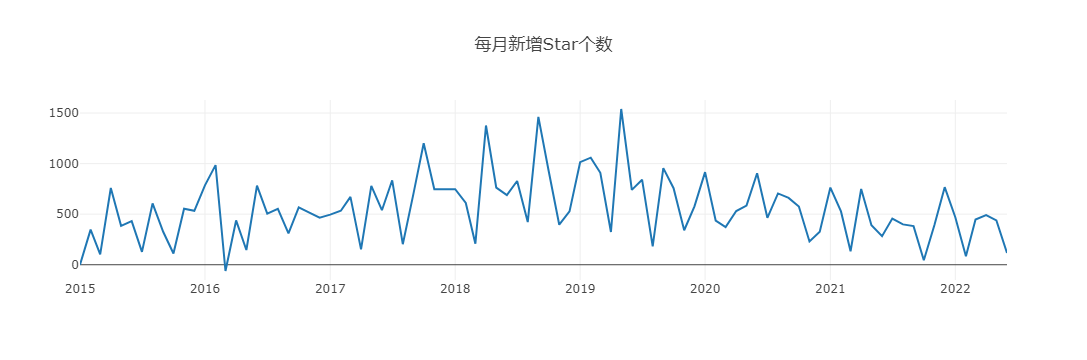

In [25]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.1.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_stargazers_count
    from github_log.events
    where toYear(created_at)=${year} and repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_stargazers_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = countArray.length - 1; i >= 1; i--) {
    countArray[i] -= countArray[i-1]; // count every month add
  }
  countArray[0] = 0
  // for(let i = 0; i < timeArray.length; i++) {
  //     console.log('年月: ' + timeArray[i]);
  //     console.log('当月新增Star: ' + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Star个数" });
});


2.1.2 - - - - - - - - - 


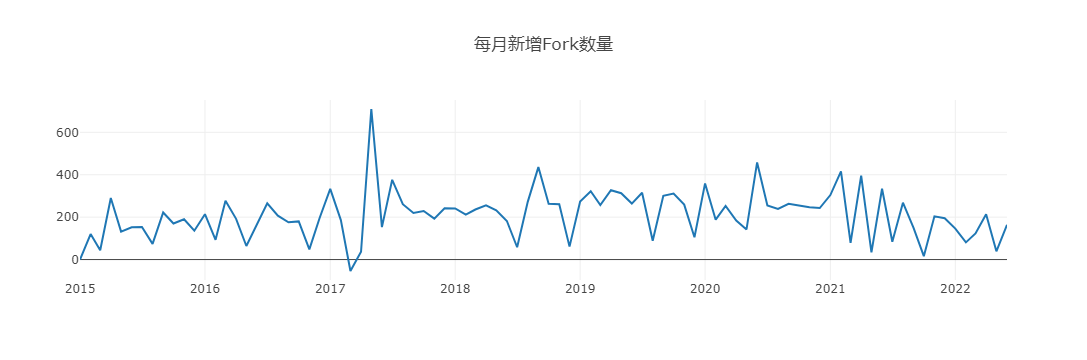

In [27]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.1.2 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_forks_count
    from github_log.events
    where toYear(created_at)=${year} and repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_forks_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = countArray.length - 1; i >= 1; i--) {
    countArray[i] -= countArray[i - 1];
  }
  countArray[0] = 0
  // for (let i = 0; i < timeArray.length; i++) {
  //   console.log("月份: " + timeArray[i]);
  //   console.log("当月新增Fork: " + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Fork数量" });
});


2.2.1 - - - - - - - - - 


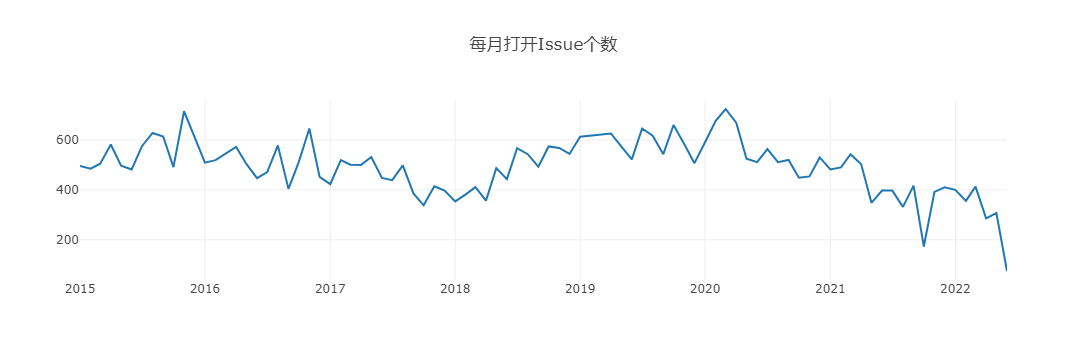

In [32]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.2.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at
    from github_log.events
    where toYear(issue_created_at)=${year} and repo_id=${repo_id} and type = 'IssuesEvent'
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for(let i = 0; i < data.length; i++) {
    for(let j = 0; j < data[i].length; j++) {
      if (tmp.hasOwnProperty(data[i][j].issue_created_at.slice(0, 7))) {
        tmp[data[i][j].issue_created_at.slice(0, 7)] += 1;
      } else {
        tmp[data[i][j].issue_created_at.slice(0, 7)] = 1;
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  // for (let i = 0; i < timeArray.length; i++) {
  //   console.log("年月: " + timeArray[i]);
  //   console.log("当月关闭Issue个数: " + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: 'scatter'
    },
  ];
  openDigger.render.plotly(data, {title: '每月打开Issue个数'});
});

2.2.1 - - - - - - - - - 


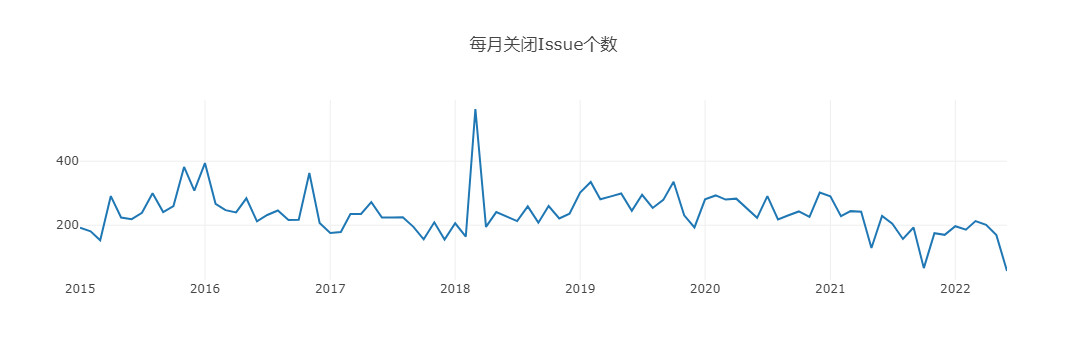

In [29]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.2.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_closed_at
    from github_log.events
    where toYear(issue_closed_at)=${year} and repo_id=${repo_id} and type = 'IssuesEvent' and action = 'closed'
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for(let i = 0; i < data.length; i++) {
    for(let j = 0; j < data[i].length; j++) {
      if (tmp.hasOwnProperty(data[i][j].issue_closed_at.slice(0, 7))) {
        tmp[data[i][j].issue_closed_at.slice(0, 7)] += 1;
      } else {
        tmp[data[i][j].issue_closed_at.slice(0, 7)] = 1;
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  // for (let i = 0; i < timeArray.length; i++) {
  //   console.log("年月: " + timeArray[i]);
  //   console.log("当月关闭Issue个数: " + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: 'scatter'
    },
  ];
  openDigger.render.plotly(data, {title: '每月关闭Issue个数'});
});

2.3.1 - - - - - - - - - 


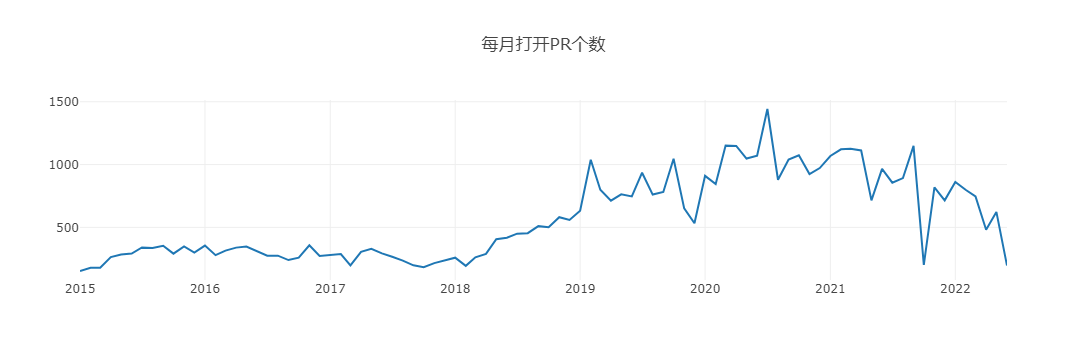

In [34]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.3.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => { // 或者 select pull_created_at
    return query(`
    select created_at
    from github_log.events
    where toYear(created_at)=${year} and repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
    `);
  })
).then((data) => {
    const tmp = {};
    for (let i = 0; i < data.length; i++) {
      for (let j = 0; j < data[i].length; j++) {
        if (tmp.hasOwnProperty(data[i][j].created_at.slice(0, 7))) {
          tmp[data[i][j].created_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].created_at.slice(0, 7)] = 1;
        }
      }
    }
    const ordered = Object.fromEntries(Object.entries(tmp).sort());
    let timeArray = [];
    let countArray = [];
    for (const key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
    }
    // for (let i = 0; i < timeArray.length; i++) {
    //   console.log("年月: " + timeArray[i]);
    //   console.log("当月打开PR个数: " + countArray[i]);
    // }
    var data = [
      {
        x: timeArray,
        y: countArray,
        type: 'scatter'
      },
    ];
    openDigger.render.plotly(data, {title: '每月打开PR个数'});
});


2.3.2 - - - - - - - - - 


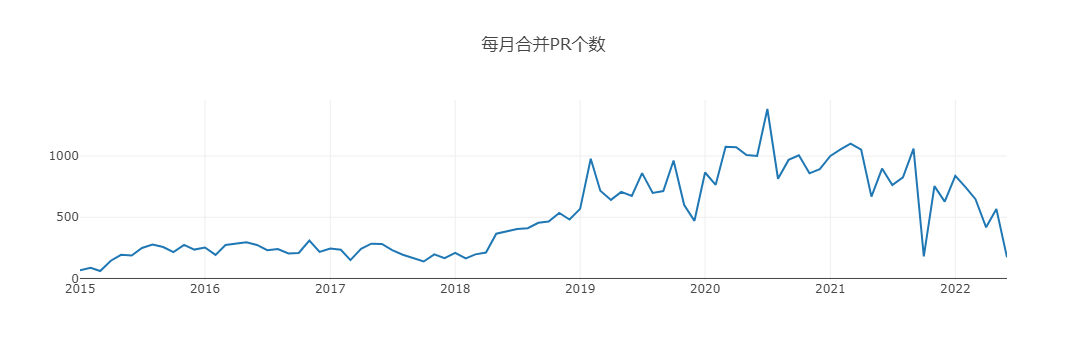

In [37]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log("2.3.2 - - - - - - - - - ");
Promise.all(
  years.map((year) => {
    return query(`
    select pull_merged_at
    from github_log.events
    where toYear(pull_merged_at)=${year} and repo_id=${repo_id} and pull_merged = 1
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].pull_merged_at.slice(0, 4) !== "1970") {
        if (tmp.hasOwnProperty(data[i][j].pull_merged_at.slice(0, 7))) {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] = 1;
        }
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  // for (let i = 0; i < timeArray.length; i++) {
  //   console.log("年月: " + timeArray[i]);
  //   console.log("当月合并PR个数: " + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月合并PR个数" });
});


2.4 - - - - - - - - - 


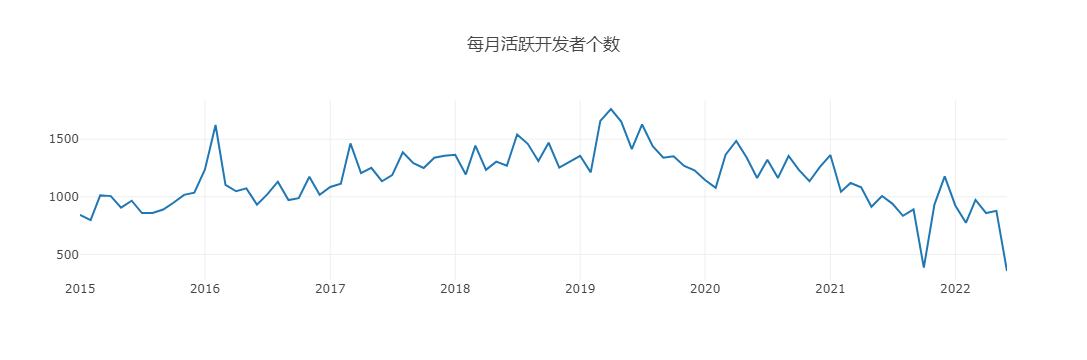

In [39]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.4 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, actor_id
    from github_log.events
    where toYear(created_at)=${year} and repo_id=${repo_id} 
    `);
  })
).then((data) => {
  var tmp = new Map();
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (!tmp.has(data[i][j].created_at.slice(0, 7))) {
        tmp.set(data[i][j].created_at.slice(0, 7), [data[i][j].actor_id]);
      } else {
        tmp.set(data[i][j].created_at.slice(0, 7), [
          data[i][j].actor_id,
          ...tmp.get(data[i][j].created_at.slice(0, 7)),
        ]);
      }
    }
  }
  let timeArray = [];
  let countArray = [];
  const tmpPair = {};
  for (let key of tmp) {
    let tmpCount = new Set(key[1]).size;
    tmpPair[key[0]] = tmpCount;
  }
  const ordered = Object.fromEntries(Object.entries(tmpPair).sort()); // sort by date
  for(let key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
  }
  // for (let i = 0; i < timeArray.length; i++) {
  //   console.log("年月: " + timeArray[i]);
  //   console.log("当月活跃开发者个数: " + countArray[i]);
  // }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月活跃开发者个数" });
});


In [42]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.5 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_created_at, issue_closed_at
    from github_log.events
    where toYear(issue_created_at)=${year} and repo_id=${repo_id} and type = 'IssuesEvent' and action = 'closed'
    `);
  })
).then((data) => {
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_closed_at != null && data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].issue_closed_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurationArray.push(duration);
      }
    }
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "Issue 从打开到关闭的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "Issue 从打开到关闭的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

2.5 - - - - - - - - - 
Issue 从打开到关闭的平均时长为 96.14天
Issue 从打开到关闭的中位数时长为 183天


In [44]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.6 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at, pull_merged_at
    from github_log.events
    where toYear(issue_created_at)=${year} and repo_id=${repo_id} and type = 'PullRequestEvent' and pull_merged = 1
    `);
  })
).then((data) => {
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].pull_merged_at != null && data[i][j].pull_merged_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].pull_merged_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurationArray.push(duration);
      }
    }
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "PR 从打开到关闭的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "PR 从打开到关闭的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

2.6 - - - - - - - - - 
PR 从打开到关闭的平均时长为 4.48天
PR 从打开到关闭的中位数时长为 1天


In [47]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 507775;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.7.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_title, issue_id, min(issue_comment_created_at) as a, issue_created_at
    from github_log.events
    where toYear(issue_created_at) = ${year} and repo_id = ${repo_id} and type = 'IssueCommentEvent' and issue_comment_author_id!= issue_author_id
    group by issue_title, issue_id ,issue_created_at
    `);
  })
).then((data) => {
  let issueStarttimeArray = [];
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_created_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        const duration = Math.round(Math.abs( Date.parse(data[i][j].a.slice(0, 10))  -  Date.parse(data[i][j].issue_created_at.slice(0, 10)) ) / oneDay);
        issueStarttimeArray.push(data[i][j].issue_created_at.slice(0, 10))
        issueDurationArray.push(duration);
      }
    }
  }
  // console.log("Issue从打开到第一次有人评论的平均时长为：")
  // for (let i = 0; i < issueStarttimeArray.length; i++) {
  //   console.log(issueStarttimeArray[i] + ": " + issueDurationArray[i])
  // }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "Issue从打开到第一次有人评论的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "Issue从打开到第一次有人评论的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

2.7.1 - - - - - - - - - 
Issue从打开到第一次有人评论的平均时长为 8.88天
Issue从打开到第一次有人评论的中位数时长为 0天
